In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from celluloid import Camera
import random

# plt.style.use('default')

#### 1− Propose a Divide-and-Conquer algorithm for the Upper Envelope Problem.

**QUESTION 1**:


**Input** : mi, bi and xj can be floats or integers ∀ i ∈ [1, n] ∀ j ∈ [1, k]
- Array of function's coordinates **Y** = [(m1,b1),(m2,b2),...(mn,bn)]
- Array **x** = [x1,x2,x3,...,xk]

**Output** : 
A list **<code>uE</code>** of sublists, where each sublist contains 2 tuples :
- each sublist of uE corresponds to a fragment of the upper envelope
- first tuple : coordinate of the function
- second tuple : index of x, where the function in first tuple is >= the other functions in Y

__Idea explanation__ : we can see the upper envelope as the union of functions over intervals segment of x.

<ins>Example</ins> : Y = [(m1,b1) , (m2,b2)] , x = [x0 , ... , x99] <br/>
uE = [ [ (m2, b2) , (0, 45) ]  ,  [ (m1, b1) , (46, 99) ] ] <br/>
The first sublist : [ (m2, b2) , (0, 45) ] means the second function y2 is >= to y1 on [x1,x45]<br/>
The second sublist : [ (m1, b1) , (46, 99) ] means the first function y1 is >= to y2 on [x46,x99]<br/>

**Pseudo-code :**

**algorithm** findUE_DC **is**


#### 2− Compute the time complexity of the D&C algorithm by ”recursion tree method”.


findUE_DC = O(nlog(n)) <br/>
conquer => n <br/>
divide => log(n) <br/>

#### 3− Implement the proposed D&C algorithm.

### Input data

In [99]:
n = 100
xk = random.randint(5,20)
x = np.linspace(-xk, xk, num=n)
#Y = [(-2,3),(-1,-9),(1.1,-1),(3.1,-7.2),(-10.5,-2.65),(-7.7,8.5),(0,12),(20,1)]
Y = [(1,0),(-1,0),(0,0.5),(-2.1,6),(-4.7,0)]

In [100]:
''' 
    Y : set of functions [(a1,b1),(a2,b2),...,(am,bm)]
    x : a vector where functions will be defined 
    plot_line(x, Y) : plot all functions y in Y for a given vector x
'''
def plot_line(x, Y):
    for y in Y:
        plt.plot(x,y[0]*x+y[1],label = (str(y[0])+'x+'+str(y[1])))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.xlabel("x")
    plt.ylabel("y")

''' 
    x : a vector where functions will be defined 
    uE : list of coordinates of the upper envelope
    plot_dashed(x, uE) : plot the upper envelope with its breakpoints
'''
def plot_dashed(x, uE):
    for item in uE : 
        k = item[0][0]*x+item[0][1]
        i1 = item[1][0] # lower index  
        i2 = item[1][1] # upper index
        t1 = plt.plot(x[i1:i2],k[i1:i2],linewidth=3, dashes=(4, 8), color='red') # plot upperEnvelope
        plt.plot(x[i1],k[i1],'ro', markersize=8) # plot breakpoint
    plt.plot(x[uE[len(uE)-1][1][1]],k[uE[len(uE)-1][1][1]],'ro',markersize=8)
    plt.legend(t1, ['Upper Envelope'])

In [85]:
# divide Y to single element
def divide(x, Y):
    if len(Y) == 1: return Y[0]
    else : 
        y1 = Y[:len(Y)//2]
        y2 = Y[len(Y)//2:]
        y1 = divide(x,y1)
        y2 = divide(x,y2)
        return conquer(x,y1, y2)


'''
f is an upper enveloppe : list of sublist of 2 tuples
create(x,f) : return a set of point f1 = [f(xi) for i in len(x)]
'''
def create(x, f): 
    f1 = []
    for item in f:
        k = item[0][0]*x[item[1][0]:item[1][1]+1] + item[0][1]
        f1.extend(k)
    return np.array(f1)



'''
f : a function, it can be only coordinate of the functon or a list of sublist
start : lower bound index of the interval studied
end : upper bound index of the interval studied
getFunctionOn(f, start, end) : return coordinate of f on [start, end] as a list of sublist of two tuples
'''
def getFunctionOn(f, start, end):
    I = []
    # if f is a list => upperEnvelope => not necessarily a linear line
    if len(f) != 0 and type(f[0])==list :
        # for each subfunction of f
        for subFunc in f : 
            lowerIndex = subFunc[1][0]
            upperIndex = subFunc[1][1]
            # current subFunc is above on the interval R = [start, end]
            if (lowerIndex <= start and end <= upperIndex):
                I.append([subFunc[0],(start,end)])
                return I
            # current subFunc is above only on [lowerIndex, end]
            elif (start <= lowerIndex and end <= upperIndex and end >= lowerIndex):
                I.append([subFunc[0],(lowerIndex,end)])
                end = lowerIndex - 1
            # current subFunc is above only on [start, upperIndex]
            elif (lowerIndex <= start and upperIndex <= end and start <= upperIndex):
                I.append([subFunc[0],(start,upperIndex)])
                start = upperIndex + 1
            # current subFunc is above only on [lowerIndex, upperIndex]
            #elif (start <= lowerIndex and upperIndex <= end): 
            #    print("4")
            #    I.append([subFunc[0],(lowerIndex, upperIndex)])
            #    I.extend(getFunctionOn(f, start, lowerIndex))
            #    I.extend(getFunctionOn(f, upperIndex, end))
            #   return I
    else : # f is a linear function
        I.append([f,(start,end)])
        return I

'''
f, g : functions (it can only be coordinate of function or function as list of sublists)
x : given vector 
conquer(x, f, g) : return the upper envelope between f and g over x
''' 


def conquer(x, f, g):
    upperE = []
    # calcule [f(xi) for i in range(x)]
    if len(f) != 0 and type(f[0])!=list :
        f1 = f[0]*x + f[1]
    else : f1 = create(x, f)
    # calcule [g(xi) for i in range(x)]
    if len(g) != 0 and type(g[0])!=list :
        g1 = g[0]*x + g[1]
    else : g1 = create(x, g)
    # get the sign of the function f1-g1
    h = np.sign(f1-g1)
    # get index of the points where a change of sign takes place
    idx = np.argwhere(np.diff(h)).flatten() 
    # it means : f>g or f<g or f=g
    if len(idx)==0:
        if -1 in h : # g is above f
            upperE.extend(getFunctionOn(g, 0, len(x)-1))
        else :  # f is above g
            upperE.extend(getFunctionOn(f, 0, len(x)-1))
    else:
        # for all segment between breakpoint :
        # if k breakpoints in idx => k+1 segment
        for i in range(len(idx)+1): 
            if i==0 :
                start, end = i, idx[i]
            elif i == len(idx):
                start, end = idx[i-1]+1, len(h)-1
            else :
                start, end = idx[i-1]+1, idx[i]
            if -1 in h[start:end] : # g is bigger than f
                # add coordinate of g over the [start,end]
                upperE.extend(getFunctionOn(g, start, end))
            else : 
                # add coordinate of f over the [start,end]
                upperE.extend(getFunctionOn(f, start, end))
    return upperE

def findUE_DC(x,Y):
    plot_line(x,Y)
    z = divide(x,Y)
    plot_dashed(x, z)
    plt.show()

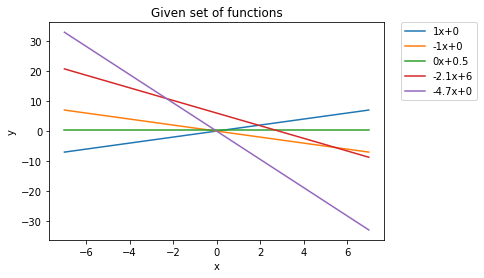

In [101]:
plot_line(x,Y)
plt.title("Given set of functions")
plt.show()

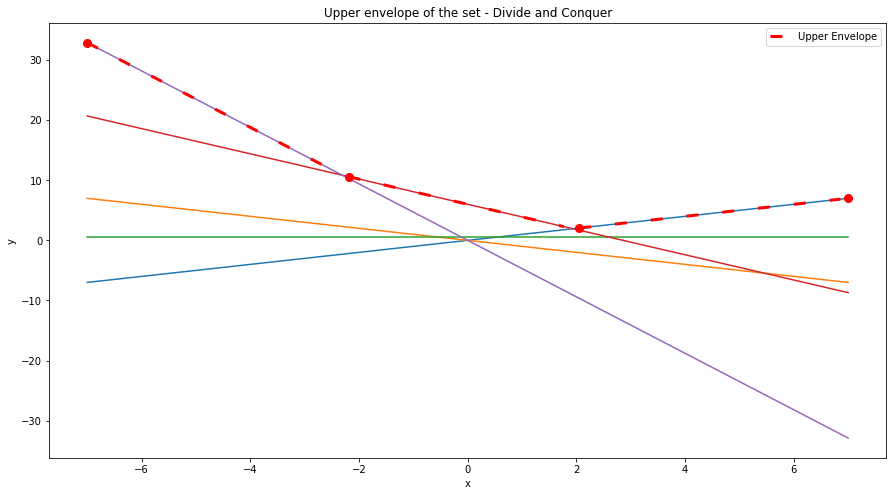

In [102]:
figsize=(15, 8)
plt.figure(figsize=figsize)
plt.title("Upper envelope of the set - Divide and Conquer")
findUE_DC(x,Y)

### DY programming

#### 4− Propose a Dynamic Programming algorithm for the Upper Envelope Problem.

#### 5− Compute the time complexity of the DP algorithm

findUE_DP(x,Y) : O(n**2)

#### 6− Implement the proposed DP algorithm.

In [103]:
def animation(x, Y, uE):
    Y1 = []
    for y in Y:
        Y1.append(y[0]*x+y[1])
    figsize=(10, 6)
    fig = plt.figure(figsize=figsize)
    camera = Camera(fig)
    visited = []
    j = 0
    for i in range(len(Y1)):
        for y in visited : 
            plt.plot(x, y, color = 'dimgrey', linewidth=1.5)
        if j != 0: plot_dashed(x,uE[j-1])

        plt.plot(x, Y1[i], color = 'cornflowerblue', linewidth=1.5)
        visited.append(Y1[i])
        camera.snap()
        
        for y in visited : 
            plt.plot(x, y, color = 'dimgrey', linewidth=1.5)
        if j != 0: plot_dashed(x,uE[j-1])
    
        camera.snap()
        for y in visited : 
            plt.plot(x, y, color = 'dimgrey', linewidth=1.5)

        plot_dashed(x,uE[j])
        j += 1

       # plt.autoscale()

        camera.snap()
    plt.xlabel("x")
    plt.ylabel("y")
    animation = camera.animate(interval=750)
    return animation

In [95]:
def findUE_DP(x,Y):
    memo = []
    for i in range(len(Y)):
        if len(memo) == 0:
            memo.append([[Y[i],(0,len(x)-1)]])
        else:
            memo.append([])
            memo[i] = conquer(x,Y[i],memo[i-1])
    return memo

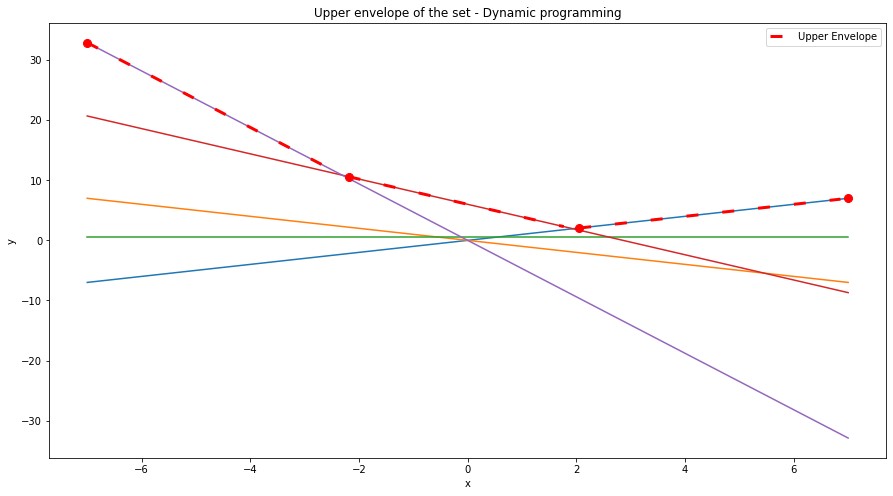

In [104]:
figsize=(15, 8)
plt.figure(figsize=figsize)
plot_line(x,Y)
uE = findUE_DP(x,Y)
plot_dashed(x,uE[len(uE)-1])
plt.title("Upper envelope of the set - Dynamic programming")
plt.show()

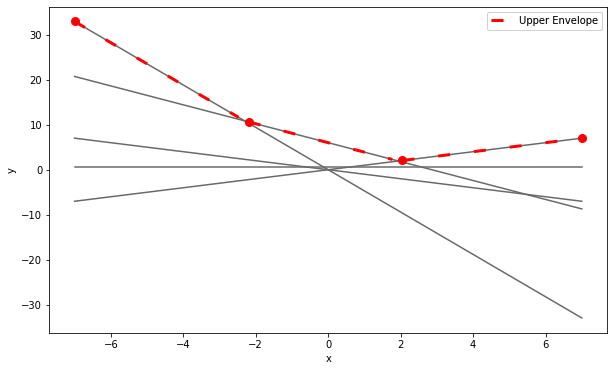

In [105]:
#plt.style.use('fivethirtyeight')
HTML(animation(x, Y, uE).to_jshtml())

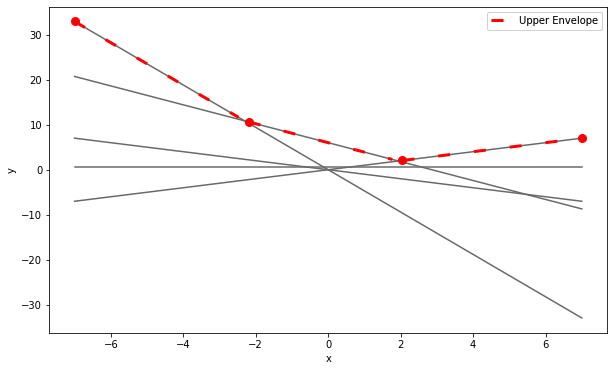

In [106]:
animation(x, Y, uE).save('upperEnvelope.mp4')